In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"moumitamudi","key":"cc7f3518d74dcf260bad79cd91904fd1"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                               title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
asinow/car-price-dataset                                          Car Price Dataset                            135KB  2025-01-26 19:53:28          12561        184  1.0              
mzohaibzeeshan/google-stock-price-data-2020-2025-googl            Google Stock Price Data (2020-2025) | GOOGL   36KB  2025-02-16 06:56:24            690         24  1.0              
adilshamim8/education-and-career-success                          Education & Career Success.                  118KB  2025-02-03 05:24:20           2997         55  1.0              
anandshaw2001/netflix-movies-and-tv-shows                         Netflix Movies and 

In [ ]:
!kaggle datasets download gti-upm/leapgestrecog


Dataset URL: https://www.kaggle.com/datasets/gti-upm/leapgestrecog
License(s): CC-BY-NC-SA-4.0
100% 2.13G/2.13G [00:22<00:00, 103MB/s] 
100% 2.13G/2.13G [00:22<00:00, 101MB/s]


In [ ]:
!unzip leapgestrecog.zip -d leapgestrecog


Streaming output truncated to the last 5000 lines.
  inflating: leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0001.png  
  inflating: leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0002.png  
  inflating: leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0003.png  
  inflating: leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0004.png  
  inflating: leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0005.png  
  inflating: leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0006.png  
  inflating: leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0007.png  
  inflating: leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0008.png  
  inflating: leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0009.png  
  inflating: leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0010.png  
  inflating: leapgestrecog/leapgestrecog/leapGest

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
DATASET_PATH = "leapgestrecog/leapGestRecog"

# Define image size
IMG_SIZE = (100, 100)

# Load images and labels
X, y = [], []
gestures = {}  # Dictionary to map labels

label_counter = 0

# Loop through session folders (00, 01, 02)
for session in os.listdir(DATASET_PATH):
    session_path = os.path.join(DATASET_PATH, session)
    if os.path.isdir(session_path):  # Ensure it's a folder
        for gesture in os.listdir(session_path):
            gesture_path = os.path.join(session_path, gesture)
            if os.path.isdir(gesture_path):
                # Assign a unique label to each gesture
                if gesture not in gestures:
                    gestures[gesture] = label_counter
                    label_counter += 1

                # Read images
                for img_name in os.listdir(gesture_path):
                    img_path = os.path.join(gesture_path, img_name)
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read in grayscale
                    img = cv2.resize(img, IMG_SIZE)  # Resize
                    X.append(img)
                    y.append(gestures[gesture])  # Use label index

# Convert to NumPy arrays
X = np.array(X).reshape(-1, IMG_SIZE[0], IMG_SIZE[1], 1)  # Add channel dimension
y = np.array(y)

# Normalize images
X = X / 255.0

# One-hot encode labels
y = to_categorical(y, num_classes=len(gestures))

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset summary
print(f"Gestures: {gestures}")
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Gestures: {'08_palm_moved': 0, '01_palm': 1, '02_l': 2, '07_ok': 3, '03_fist': 4, '06_index': 5, '10_down': 6, '04_fist_moved': 7, '05_thumb': 8, '09_c': 9}
Training set: (16000, 100, 100, 1), (16000, 10)
Test set: (4000, 100, 100, 1), (4000, 10)


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(gestures), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,638,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,732,490 (6.61 MB)

 Trainable params: 1,732,490 (6.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 265s 526ms/step - accuracy: 0.7185 - loss: 0.8138 - val_accuracy: 0.9995 - val_loss: 0.0026
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 314s 511ms/step - accuracy: 0.9860 - loss: 0.0397 - val_accuracy: 1.0000 - val_loss: 2.9501e-04
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 262s 510ms/step - accuracy: 0.9878 - loss: 0.0317 - val_accuracy: 1.0000 - val_loss: 2.2407e-04
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 264s 513ms/step - accuracy: 0.9953 - loss: 0.0175 - val_accuracy: 0.9998 - val_loss: 0.0014
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 261s 521ms/step - accuracy: 0.9940 - loss: 0.0170 - val_accuracy: 1.0000 - val_loss: 3.3466e-05
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 259s 516ms/step - accuracy: 0.9940 - loss: 0.0177 - val_accuracy: 1.0000 - val_loss: 3.4404e-05
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 262s 516ms/step - accuracy: 0.9943 - loss: 0.0143 - val_accuracy: 1.0000 - val_loss: 2.0135e-05
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 265s 522ms/step 

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 134ms/step - accuracy: 1.0000 - loss: 3.9487e-05
Test Accuracy: 1.00


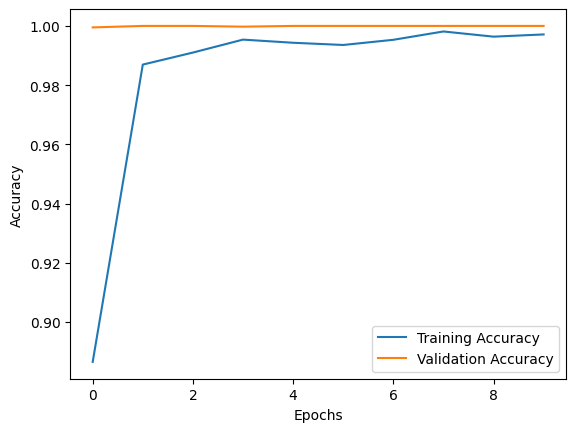

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 129ms/step


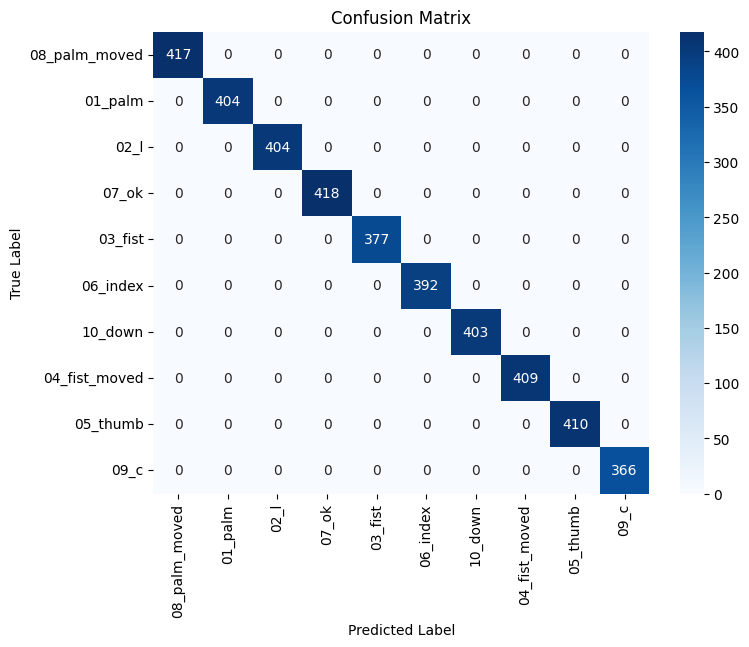

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict on test set
y_pred = model.predict(X_test)

# Convert predictions & true labels from one-hot to class indices
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=gestures, yticklabels=gestures)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred_classes, target_names=gestures))


               precision    recall  f1-score   support

08_palm_moved       1.00      1.00      1.00       417
      01_palm       1.00      1.00      1.00       404
         02_l       1.00      1.00      1.00       404
        07_ok       1.00      1.00      1.00       418
      03_fist       1.00      1.00      1.00       377
     06_index       1.00      1.00      1.00       392
      10_down       1.00      1.00      1.00       403
04_fist_moved       1.00      1.00      1.00       409
     05_thumb       1.00      1.00      1.00       410
         09_c       1.00      1.00      1.00       366

     accuracy                           1.00      4000
    macro avg       1.00      1.00      1.00      4000
 weighted avg       1.00      1.00      1.00      4000



In [ ]:
model.save("hand_gesture_model.h5")


In [ ]:
from google.colab import files
files.download("hand_gesture_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>